## Some facts from US Graduate School admission


International students are applying to a graduate program in a US university using GRE scores, Toefl score, statement of purpose, letter of recommendations, GPA, and research. I would like to investigate the following questions:

1. Is it true that students who apply into schools with higher rank are better (students with higher standard test scores, GPA, stronger SOP, ...)?
2. Do standard test scores, GPA contribute to the strength of letter of recommendation?
3. Rank the factors among GRE scores, Toefl score, Statement of purpose, letter of recommendations, GPA, and research that contribute more to the chance of admission.

## 0. Data loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('adm_data.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


## 1. Higher schools tend to receive applications from better students

The following charts clearly show that better students (i.e. students with higher standard test scores, higher GPA, stronger statement of purpose, stronger letter of recommendation, and research participation) tends to apply to the schools with higher ranks.   

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

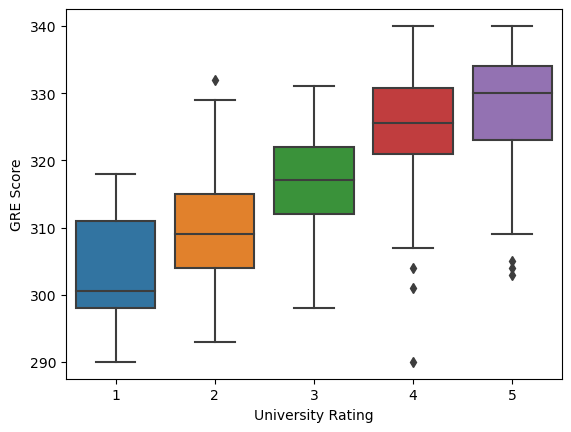

In [3]:
sns.boxplot(data = df, x = 'University Rating', y = 'GRE Score')

<AxesSubplot:xlabel='University Rating', ylabel='TOEFL Score'>

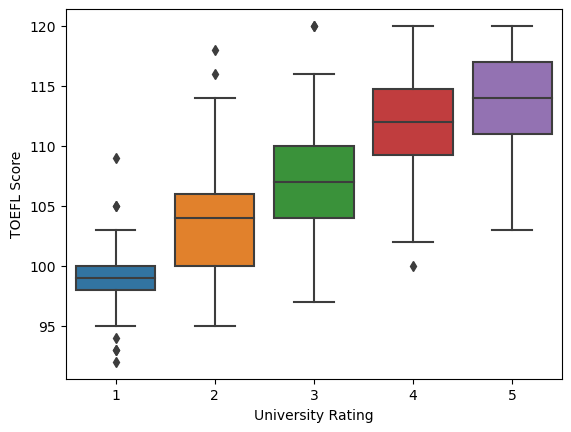

In [4]:
sns.boxplot(data = df, x = 'University Rating', y = 'TOEFL Score')

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

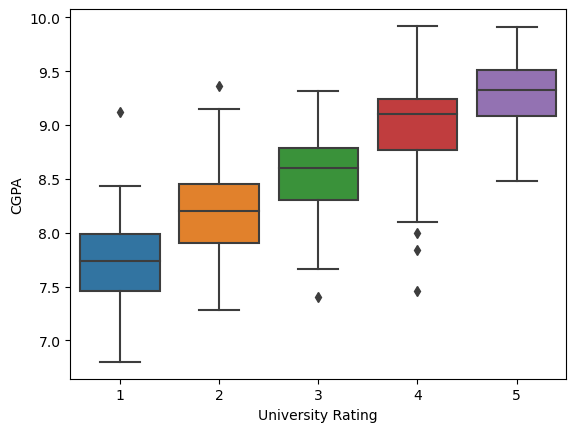

In [5]:
sns.boxplot(data = df, x = 'University Rating', y = 'CGPA')

<AxesSubplot:xlabel='University Rating', ylabel='SOP'>

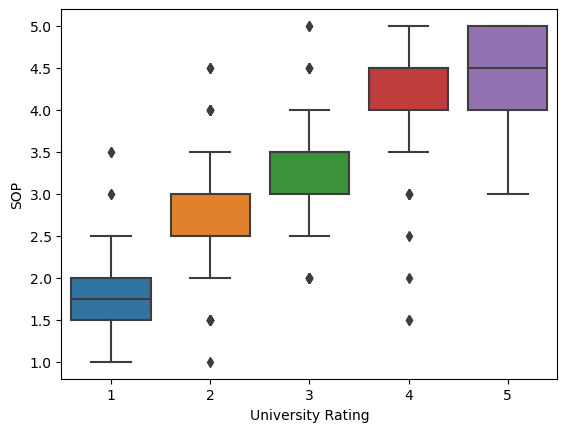

In [6]:
sns.boxplot(data = df, x = 'University Rating', y = 'SOP')

<AxesSubplot:xlabel='University Rating', ylabel='LOR '>

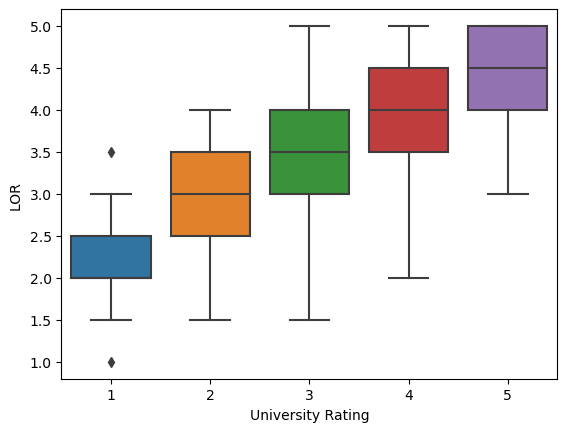

In [7]:
sns.boxplot(data = df, x = 'University Rating', y = 'LOR ')

## 2. GPA and doing research seem the most important contributions to the strength of letter of recommendation

I investigate the factors that contributes to the strength of letter of recommendations. From the charts and the statistics below, it seems that GPA and doing research are more important that standard test scores.

Text(0.5, 1.0, 'The Pearsonr coefficient between GRE score and LOR strength is 0.56')

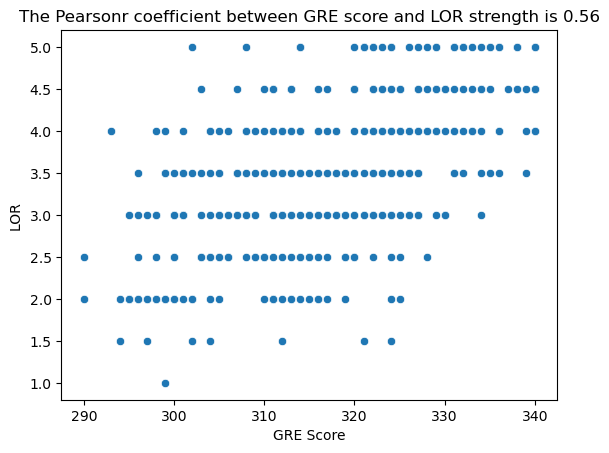

In [8]:
corr_GRE_LOR = pearsonr(df['GRE Score'], df['LOR '])[0]
sns.scatterplot(data = df, x = 'GRE Score', y = 'LOR ')
plt.title('The Pearsonr coefficient between GRE score and LOR strength is {}'.format(round(corr_GRE_LOR, 2)))

Text(0.5, 1.0, 'The Pearsonr coefficient between Toefl score and LOR strength is 0.57')

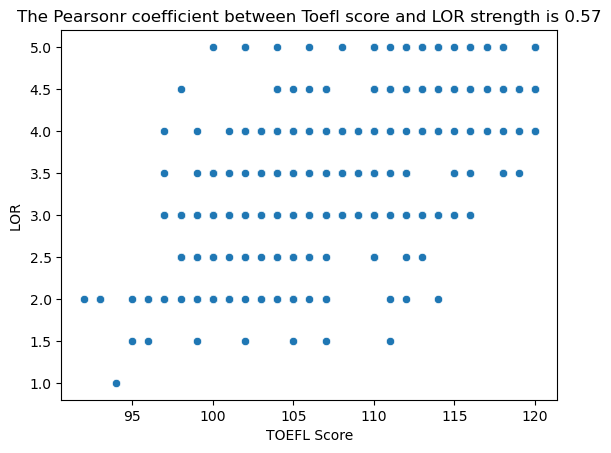

In [9]:
corr_TOEFL_LOR = pearsonr(df['TOEFL Score'], df['LOR '])[0]
sns.scatterplot(data = df, x = 'TOEFL Score', y = 'LOR ')
plt.title('The Pearsonr coefficient between Toefl score and LOR strength is {}'.format(round(corr_TOEFL_LOR, 2)))

Text(0.5, 1.0, 'The Pearsonr coefficient between GPA and LOR strength is 0.67')

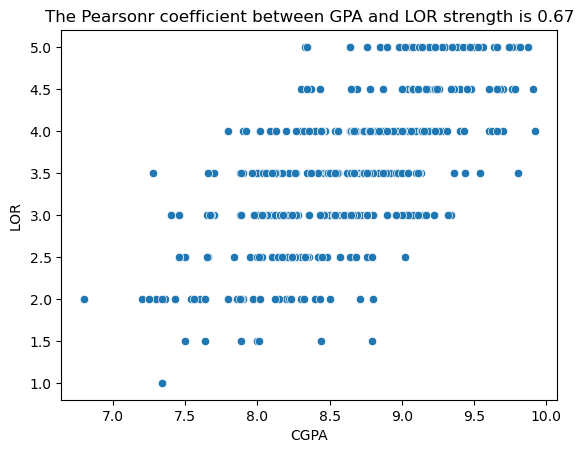

In [10]:
corr_CGPA_LOR = pearsonr(df['CGPA'], df['LOR '])[0]
sns.scatterplot(data = df, x = 'CGPA', y = 'LOR ')
plt.title('The Pearsonr coefficient between GPA and LOR strength is {}'.format(round(corr_CGPA_LOR, 2)))

<AxesSubplot:xlabel='Research', ylabel='LOR '>

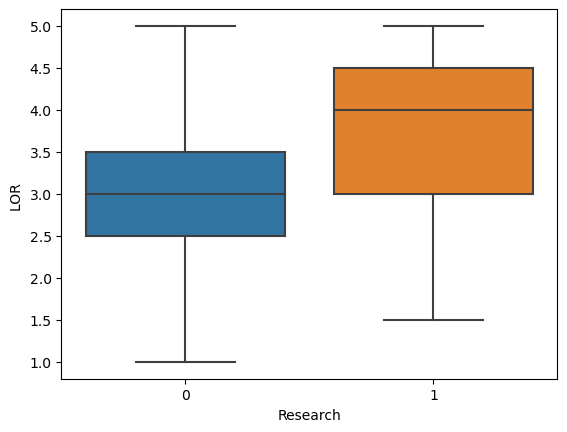

In [11]:
sns.boxplot(data = df, x = 'Research', y = 'LOR ')

## 3. Higher standard test scores and GPA contribute more to the chance of admission than the strength of statement of purpose and letter of recommendation

I investigate the chance of admission by the factors standard tests, GPA, SOP and LOR strength, and research activities. It is common that the higher rank of the school the lower chance of admission. Therefore, we should only work on application to the same school rank. We choose applications from the schools of rank 3/5 to investigate our questions since the data provides more cases for this rank (see below)

In [12]:
df['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

In [13]:
df3 = df[df['University Rating'] == 3]

From the below charts and statistics, we can arrange the importance of each factors as follows: Research (the most important), GPA, GRE scores, Toefl sores, Statement of purpose, and letter of recommendation (the least important)

Text(0.5, 1.0, 'The Pearsonr coefficient between GRE score and Chance of Admit is 0.52')

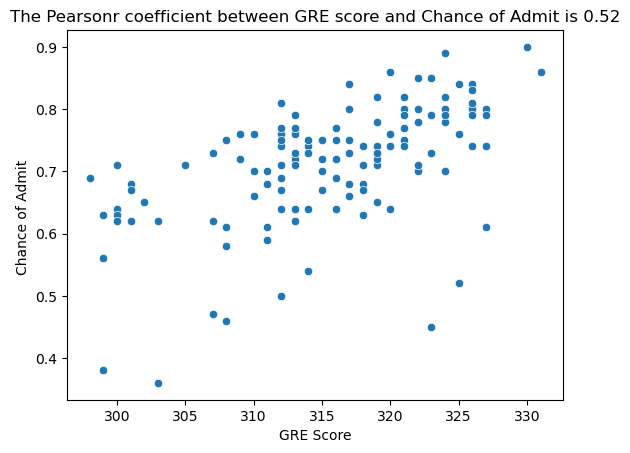

In [14]:
corr_GRE_CoA = round(pearsonr(df3['GRE Score'], df3['Chance of Admit '])[0],2)
sns.scatterplot(data = df3, x = 'GRE Score', y = 'Chance of Admit ')
plt.title('The Pearsonr coefficient between GRE score and Chance of Admit is {}'.format(corr_GRE_CoA))

Text(0.5, 1.0, 'The Pearsonr coefficient between GRE score and Chance of Admit is 0.46')

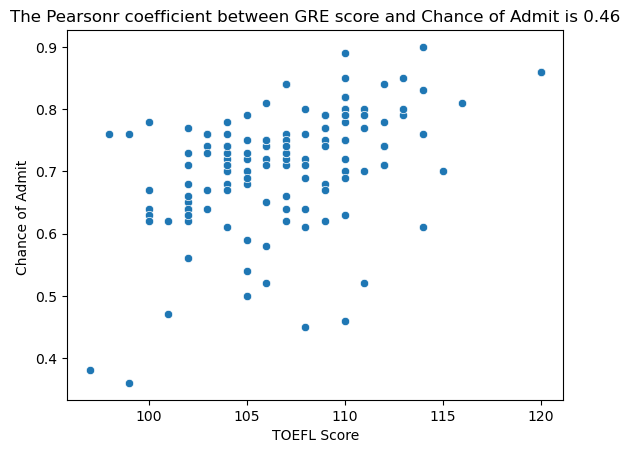

In [15]:
corr_TOEFL_CoA = round(pearsonr(df3['TOEFL Score'], df3['Chance of Admit '])[0], 2)
sns.scatterplot(data = df3, x = 'TOEFL Score', y = 'Chance of Admit ')
plt.title('The Pearsonr coefficient between GRE score and Chance of Admit is {}'.format(corr_TOEFL_CoA))

Text(0.5, 1.0, 'The Pearsonr coefficient between SOP strength and Chance of Admit is 0.12')

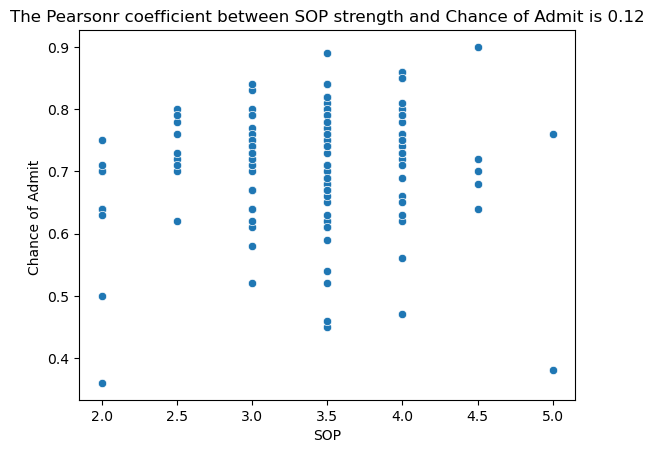

In [16]:
corr_SOP_CoA = pearsonr(df3['SOP'], df3['Chance of Admit '])[0]
sns.scatterplot(data = df3, x = 'SOP', y = 'Chance of Admit ')
plt.title('The Pearsonr coefficient between SOP strength and Chance of Admit is {}'.format(round(corr_SOP_CoA, 2)))

Text(0.5, 1.0, 'The Pearsonr coefficient between LOR strength and Chance of Admit is 0.27')

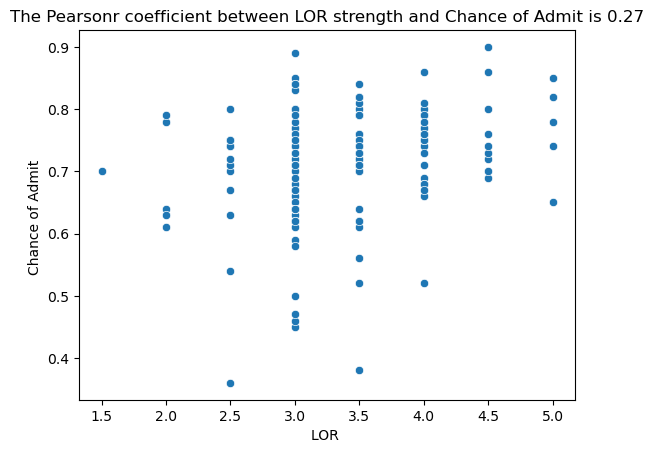

In [17]:
corr_LOR_CoA = pearsonr(df3['LOR '], df3['Chance of Admit '])[0]
sns.scatterplot(data = df3, x = 'LOR ', y = 'Chance of Admit ')
plt.title('The Pearsonr coefficient between LOR strength and Chance of Admit is {}'.format(round(corr_LOR_CoA, 2)))

Text(0.5, 1.0, 'The Pearsonr coefficient between GPA and Chance of Admit is 0.64')

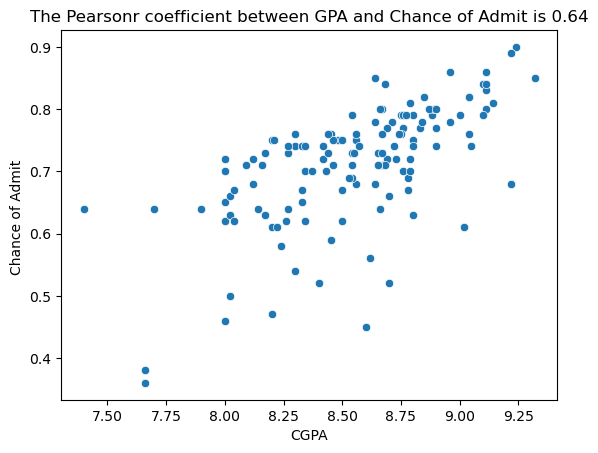

In [18]:
corr_GPA_CoA = pearsonr(df3['CGPA'], df3['Chance of Admit '])[0]
sns.scatterplot(data = df3, x = 'CGPA', y = 'Chance of Admit ')
plt.title('The Pearsonr coefficient between GPA and Chance of Admit is {}'.format(round(corr_GPA_CoA, 2)))

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

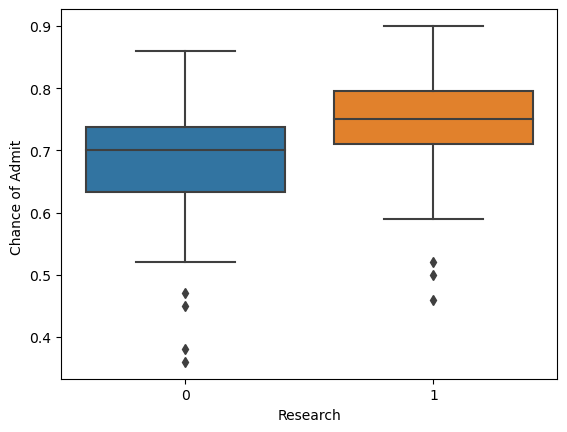

In [19]:
sns.boxplot(data = df3, x = 'Research', y = 'Chance of Admit ')